In [2]:
import control
import scipy
from scipy import signal

In [3]:
num, den = [5],[1,3,4,0]
Ys = control.TransferFunction(num, den)
Ys

TransferFunction(array([5]), array([1, 3, 4, 0]))

In [4]:
res1 = signal.residue(num, den)

In [5]:
res1

(array([ 1.25 +0.j        , -0.625+0.70868339j, -0.625-0.70868339j]),
 array([ 0. +0.j        , -1.5+1.32287566j, -1.5-1.32287566j]),
 array([], dtype=float64))

In [6]:
import sympy
from sympy import Symbol 

In [7]:
t = Symbol('t')
yt = Symbol('yt')
e = Symbol('e')

In [8]:
yt = res1[0][0]*e**(res1[1][0]*t) + res1[0][1]*e**(res1[1][1]*t) + res1[0][2]*e**(res1[1][2]*t)
yt

e**(t*(-1.5 - 1.3228756555323*I))*(-0.625 - 0.708683386892301*I) + e**(t*(-1.5 + 1.3228756555323*I))*(-0.625 + 0.708683386892301*I) + 1.25

In [10]:
import numpy as np
import cmath
yout , T = control.impulse_response(Ys)
T1 = np.arange(0, 25, 0.01)
res = []

for t1 in T1:
    yt1 = res1[0][0]*cmath.exp(res1[1][0]*t1) + res1[0][1]*cmath.exp(res1[1][1]*t1) + res1[0][2]*cmath.exp(res1[1][2]*t1)
    res.append(yt1)

/home/JoaoYamashita/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Resposta usando os residuos')

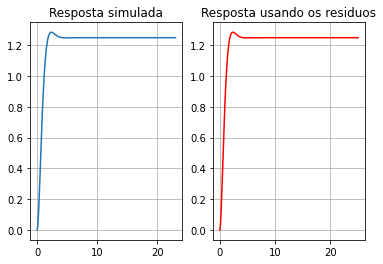

In [11]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(1,2,1)
plt.plot(yout, T)
plt.grid()
plt.title("Resposta simulada")
plt.subplot(1,2,2)
plt.plot(T1, res, 'r')
plt.grid()
plt.title("Resposta usando os residuos")

/home/JoaoYamashita/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Resposta usando os residuos')

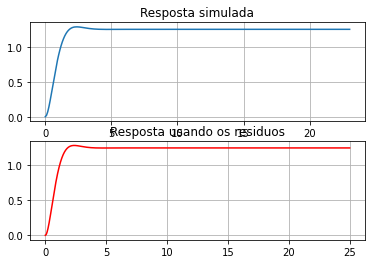

In [12]:
plt.figure(0)
plt.subplot(2,1,1)
plt.plot(yout, T)
plt.grid()
plt.title("Resposta simulada")
plt.subplot(2,1,2)
plt.plot(T1, res, 'r')
plt.grid()
plt.title("Resposta usando os residuos")

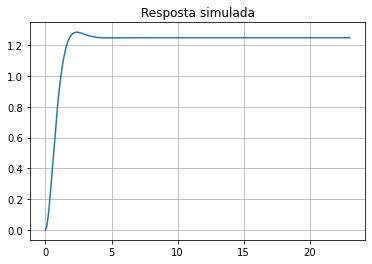

In [13]:
plt.plot(yout, T)
plt.title("Resposta simulada")
plt.grid()

/home/JoaoYamashita/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


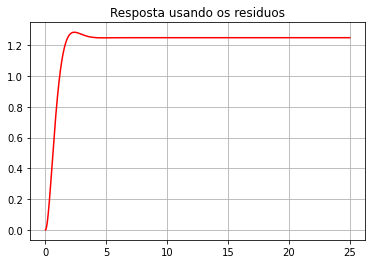

In [14]:
plt.figure(1)
plt.plot(T1, res, 'r')
plt.title("Resposta usando os residuos")
plt.grid()

Item 3
Resposta ao degrau

In [15]:
Ys2 = control.TransferFunction([1], [1, 0]) * Ys # 1/s * Y(s)
Ys2

TransferFunction(array([5.]), array([1, 3, 4, 0, 0]))

In [24]:
Ys2.den[0][0][:]

array([1, 3, 4, 0, 0])

In [26]:
res2 = signal.residue(Ys2.num[0][0][:], Ys2.den[0][0][:])
res2

(array([-0.9375 +0.j        ,  1.25   +0.j        ,  0.46875-0.05905695j,
         0.46875+0.05905695j]),
 array([ 0. +0.j        ,  0. +0.j        , -1.5+1.32287566j,
        -1.5-1.32287566j]),
 array([], dtype=float64))

In [27]:
import sympy
from sympy import Symbol 

t = Symbol('t')
yt = Symbol('yt')
e = Symbol('e')

In [28]:
yt = res2[0][0]*e**(res2[1][0]*t) + t*res2[0][1]*e**(res2[1][1]*t) + res2[0][2]*e**(res2[1][2]*t) + res2[0][3]*e**(res2[1][3]*t) #Coloquei *t pq tem dois polos iguais https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.residue.html
yt

e**(t*(-1.5 - 1.3228756555323*I))*(0.46875 + 0.0590569489076918*I) + e**(t*(-1.5 + 1.3228756555323*I))*(0.46875 - 0.0590569489076918*I) + 1.25*t - 0.9375

In [29]:
import numpy as np
import cmath

In [30]:
yout2 , T3 = control.impulse_response(Ys2)

In [31]:
res =[]
T1 = np.arange(0, 25, 0.01)
for t1 in T1:
    yt1 = res2[0][0]*cmath.exp(res2[1][0]*t1) + t1*res2[0][1]*cmath.exp(res2[1][1]*t1) + res2[0][2]*cmath.exp(res2[1][2]*t1) + res2[0][3]*cmath.exp(res2[1][3]*t1)
    res.append(yt1)

In [32]:
import matplotlib.pyplot as plt

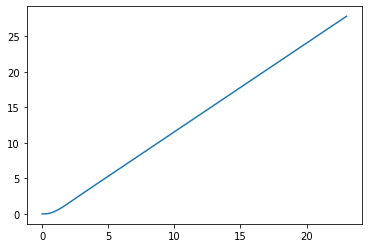

In [33]:
plt.plot(yout2, T3)

/home/JoaoYamashita/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


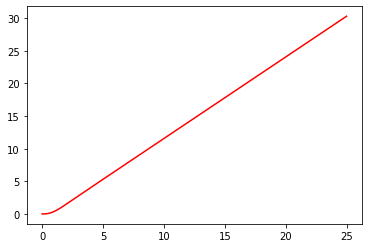

In [35]:
plt.plot(T1, res, 'r')

/home/JoaoYamashita/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Resposta usando os residuos')

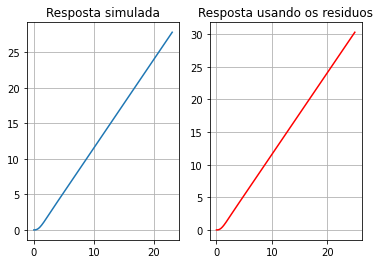

In [36]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.subplot(1,2,1)
plt.plot(yout2, T3)
plt.grid()
plt.title("Resposta simulada")
plt.subplot(1,2,2)
plt.plot(T1, res, 'r')
plt.grid()
plt.title("Resposta usando os residuos")